
___
# K Means Clustering Project 

Use KMeans Clustering to cluster Universities into to different groups.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [81]:
college=pd.read_csv('College_Data',index_col=0)
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**Check the head of the data**

In [4]:
college.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


** Check the info() and describe() methods on the data.**

In [5]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


**Create some exploratory visualizations to analyse the data**

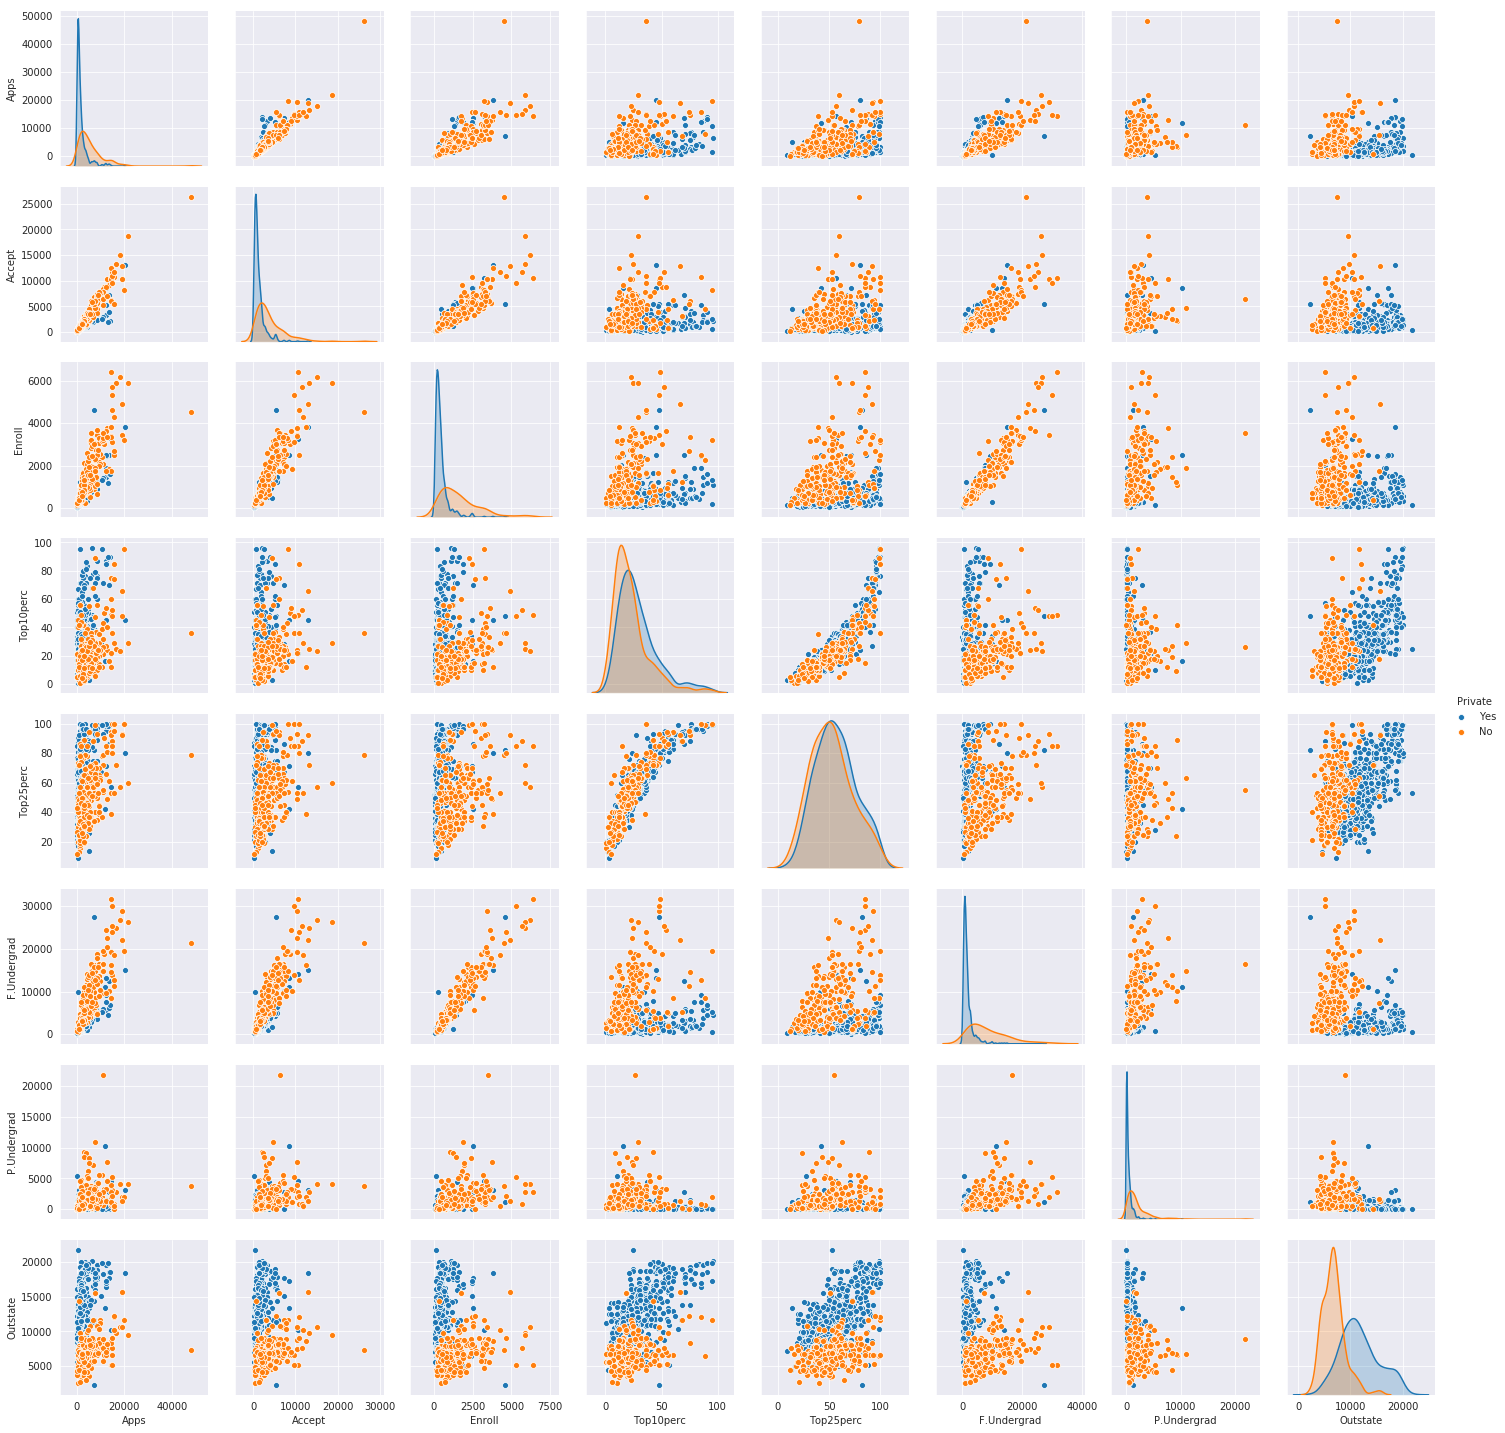

In [86]:
sns.pairplot(data=college.iloc[:,0:9],hue='Private',kind='scatter')

**Create a scatterplot of Room.Board versus Grad.Rate where the points are colored by the Private column.**

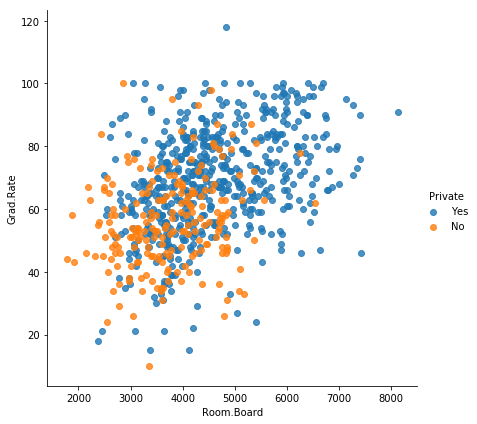

In [18]:
sns.lmplot('Room.Board','Grad.Rate',data=college,hue='Private',fit_reg=False,height=6,aspect=1)

**Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

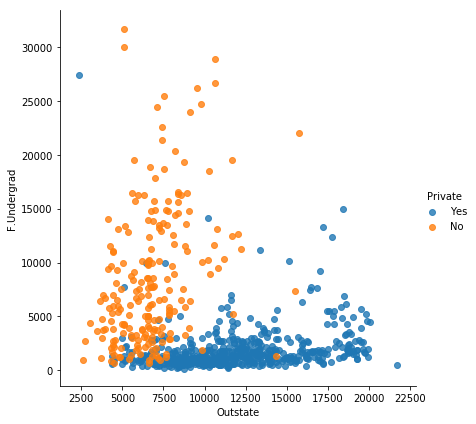

In [19]:
sns.lmplot('Outstate','F.Undergrad',data=college, hue='Private',fit_reg=False,height=6,aspect=1)

**Create a stacked histogram showing Out of State Tuition based on the Private column**

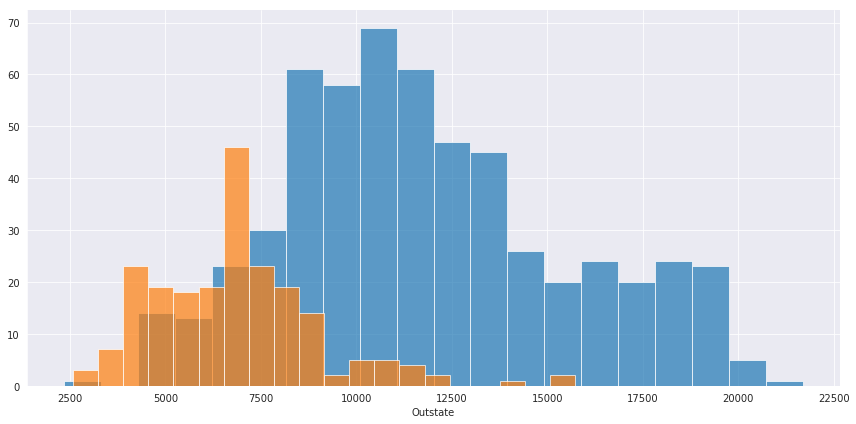

In [30]:
sns.set_style('darkgrid')
g=sns.FacetGrid(data=college,hue='Private',height=6,aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

**Create a similar histogram for the Grad.Rate column.**

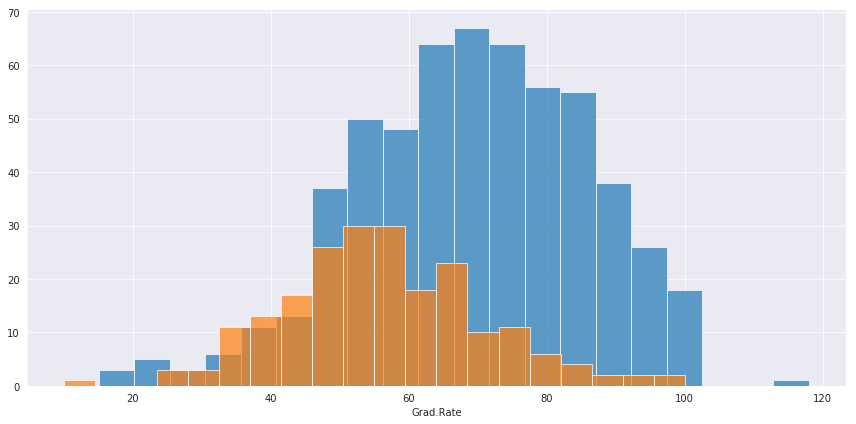

In [28]:
g=sns.FacetGrid(data=college,hue='Private',height=6,aspect=2)
g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

**Find out which schools with a graduation rate of higher than 100%.**

In [31]:
college[college['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


** Set that school's graduation rate to 100 **

In [33]:
college['Grad.Rate']['Cazenovia College']=100

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Redo the plot

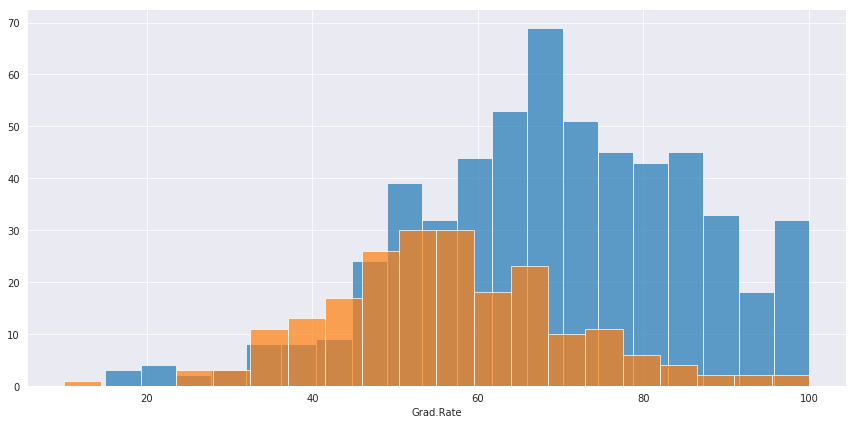

In [34]:
g=sns.FacetGrid(data=college,hue='Private',height=6,aspect=2)
g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

## K Means Cluster Creation



In [35]:
from sklearn.cluster import KMeans

**Set up X and find out the best K values using elbow method**

Text(0, 0.5, 'WCSS')

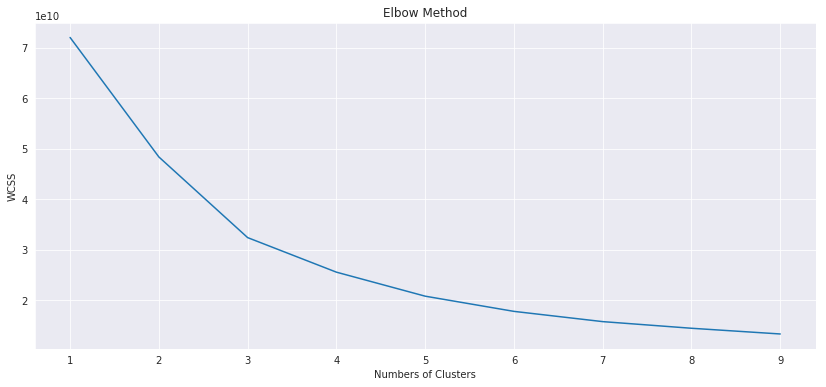

In [80]:
plt.figure(figsize=(14,6))
wcss= []
for i in range(1,10):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('Numbers of Clusters')
plt.ylabel('WCSS')

In [39]:
X= college.drop('Private',axis=1).values
X[0:3]

array([[1.6600e+03, 1.2320e+03, 7.2100e+02, 2.3000e+01, 5.2000e+01,
        2.8850e+03, 5.3700e+02, 7.4400e+03, 3.3000e+03, 4.5000e+02,
        2.2000e+03, 7.0000e+01, 7.8000e+01, 1.8100e+01, 1.2000e+01,
        7.0410e+03, 6.0000e+01],
       [2.1860e+03, 1.9240e+03, 5.1200e+02, 1.6000e+01, 2.9000e+01,
        2.6830e+03, 1.2270e+03, 1.2280e+04, 6.4500e+03, 7.5000e+02,
        1.5000e+03, 2.9000e+01, 3.0000e+01, 1.2200e+01, 1.6000e+01,
        1.0527e+04, 5.6000e+01],
       [1.4280e+03, 1.0970e+03, 3.3600e+02, 2.2000e+01, 5.0000e+01,
        1.0360e+03, 9.9000e+01, 1.1250e+04, 3.7500e+03, 4.0000e+02,
        1.1650e+03, 5.3000e+01, 6.6000e+01, 1.2900e+01, 3.0000e+01,
        8.7350e+03, 5.4000e+01]])

In [49]:
X.shape

(777, 17)

**Fit the model to all the data except for the Private label.**

In [44]:
kmeans=KMeans(n_clusters=3)
y_pred=kmeans.fit_predict(X)

In [46]:
y_pred[0:10]

array([0, 0, 0, 2, 0, 0, 0, 0, 2, 0], dtype=int32)

In [47]:
kmeans.cluster_centers_

array([[1.70182301e+03, 1.23653451e+03, 4.91520354e+02, 2.18194690e+01,
        4.97769912e+01, 2.22618053e+03, 6.56030088e+02, 9.28193982e+03,
        4.14370619e+03, 5.37015929e+02, 1.32979646e+03, 6.75787611e+01,
        7.51433628e+01, 1.46362832e+01, 2.09274336e+01, 7.83074690e+03,
        6.27752212e+01],
       [1.06216145e+04, 7.30063855e+03, 2.93942169e+03, 3.20000000e+01,
        6.34698795e+01, 1.54825060e+04, 3.17455422e+03, 8.23585542e+03,
        4.13487952e+03, 5.94349398e+02, 1.88833735e+03, 8.41566265e+01,
        8.95542169e+01, 1.64072289e+01, 1.58072289e+01, 9.44095181e+03,
        6.05060241e+01],
       [3.79185271e+03, 2.04663566e+03, 6.53937984e+02, 4.98372093e+01,
        7.72248062e+01, 2.57355039e+03, 2.35829457e+02, 1.69343256e+04,
        5.43727907e+03, 5.74604651e+02, 1.03575194e+03, 8.75193798e+01,
        9.33333333e+01, 1.02046512e+01, 3.51627907e+01, 1.78138140e+04,
        8.02868217e+01]])

In [50]:
college['Clusters']=y_pred

In [51]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Clusters
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,2
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0


In [79]:
college['Clusters'].value_counts()

0    565
2    129
1     83
Name: Clusters, dtype: int64

** Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [59]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(college['Clusters'],kmeans.labels_))
print(classification_report(college['Clusters'],kmeans.labels_))

[[565   0   0]
 [  0  83   0]
 [  0   0 129]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       565
           1       1.00      1.00      1.00        83
           2       1.00      1.00      1.00       129

   micro avg       1.00      1.00      1.00       777
   macro avg       1.00      1.00      1.00       777
weighted avg       1.00      1.00      1.00       777

